# Quantum Neural Network for Binary Classification of Iris Data
### 3.1 QNN_iris.ipynb
### James Saslow
### 4/27/2024

______________________________________________________________________________

This Jupyter Notebook accomplishes the following tasks:
- Imports 'iris_dataset.csv', and splits & formats data into training & testing data
- Trains parameters on Quantum Neural Network model to perform binary classification
- Trains parameters on Perceptron Neural Network model to perform binary classification

The specifics of each task are outlined in more detail each corresponding subsection below.

In [1]:
#Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from qiskit.circuit import Parameter
from qiskit.quantum_info import Operator
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import UnitaryGate
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, qpy

# Custom Packages
import Qfuncs5 as qf                                    # My own custom Qiskit Package 
from QuantumNeuralNetwork import QuantumNeuralNetwork   # Custom Made QNN Trainer for our PQC
from NeuralNetScore import nn_confusion                 # Generate confusion matrix for neural net binary classifier


import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model


# Setting a Random Seed for Reproducability
np.random.seed(9)

# Importing 'iris_dataset.csv'

Here, we use pandas to import the 'iris_dataset.csv' file.

We then gather the petal length scaled, and petal width scaled as our two feature variables $x_{0}$, $x_{1}$, and extract their associated class labels by calling the 'binary targets' column.

Next, we split the dataset such that the first 80% of the data is training data and the last 20% is testing data.

In [2]:
# Importing 'iris_dataset.csv'
df = pd.read_csv('iris_dataset.csv')

# Displaying Pandas DataFrame
df

,sepal length,sepal width,petal length,petal width,petal length scaled,petal width scaled,targets,binary targets
0,6.4,2.7,5.3,1.9,0.728814,0.750000,Iris-virginica,1
1,6.3,2.5,4.9,1.5,0.661017,0.583333,Iris-versicolor,1
2,5.1,3.5,1.4,0.2,0.067797,0.041667,Iris-setosa,0
3,4.4,3.0,1.3,0.2,0.050847,0.041667,Iris-setosa,0
4,6.4,2.8,5.6,2.2,0.779661,0.875000,Iris-virginica,1
...,...,...,...,...,...,...,...,...
145,5.2,3.5,1.5,0.2,0.084746,0.041667,Iris-setosa,0
146,6.0,2.2,5.0,1.5,0.677966,0.583333,Iris-virginica,1
147,5.8,2.7,4.1,1.0,0.525424,0.375000,Iris-versicolor,1
148,6.1,2.9,4.7,1.4,0.627119,0.541667,Iris-versicolor,1


In [3]:
# Gathering Data from Dataframe
X = df[["petal length scaled", "petal width scaled"]].values
binary_targets = df["binary targets"].values

# Splitting Data into Training & Testing Data
x_train = X[:120]
binary_targets_train = binary_targets[:120]

x_test = X[120:]
binary_targets_test = binary_targets[120:]


print(X.shape)


(150, 2)


# Loading in Parameterized Quantum Circuit and Training the Quantum Neural Network

Here, we load in our parameterized quantum circuit file 'parameterized_qc.qpy' and read it as a Qiskit *QuantumCircuit* class and draw the circuit to confirm that the PQC loaded in without any errors.

Next, we define QNN as a QuantumNeuralNetwork class, specify the number of epochs and learning rate, then use QuantumNeuralNetwork.train() to train the model parameters and assess model performance.

After, we can use QuantumNeuralNetwork.get() to retrieve the updated model parameters, QuantumNeuralNetwork.confusion_matrix() to assess model error, and QuantumNeuralNetwork.learning_graph() to plot the objective function as a function of epoch.

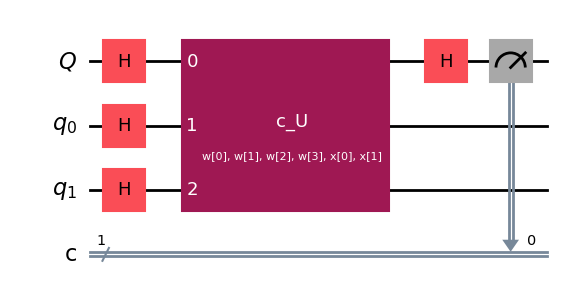

In [4]:
# Loading in the PQC
with open("parameterized_qc.qpy", "rb") as qpy_file_read:
    qc = qpy.load(qpy_file_read)[0]

qc.draw("mpl")

In [5]:
# Building Quantum Neural Network
QNN = QuantumNeuralNetwork(qc,x_train, binary_targets_train, x_test, binary_targets_test, \
epoch = 30)

# Training QNN
QNN.train()

Epoch 1
Cost Function :  0.0584898214487
Model Error   :  5.0 %
omega_vec =  [0.09459447 3.147828   3.11744104 0.86085812]
 
Epoch 2
Cost Function :  0.05719523889215001
Model Error   :  4.166666666666667 %
omega_vec =  [0.12395584 3.14221303 3.11955634 0.8809972 ]
 
Epoch 3
Cost Function :  0.05590593360595001
Model Error   :  4.166666666666667 %
omega_vec =  [0.15323739 3.13651202 3.12137491 0.90125728]
 
Epoch 4
Cost Function :  0.05458117852766666
Model Error   :  4.166666666666667 %
omega_vec =  [0.18239425 3.13074608 3.12290911 0.9216031 ]
 
Epoch 5
Cost Function :  0.05328052535534999
Model Error   :  4.166666666666667 %
omega_vec =  [0.21140247 3.12491365 3.12416408 0.94200325]
 
Epoch 6
Cost Function :  0.052001464275600005
Model Error   :  4.166666666666667 %
omega_vec =  [0.24023705 3.11901336 3.12514059 0.9624342 ]
 
Epoch 7
Cost Function :  0.050704875927700024
Model Error   :  4.166666666666667 %
omega_vec =  [0.26885905 3.11306588 3.12585795 0.98285671]
 
Epoch 8
Cost Fu

In [6]:
# Getting Trained Model Parameterss
QNN.get()

array([0.82823332, 2.97351861, 3.09054769, 1.40254304])

Quantum Neural Network Binary Classifier Performance


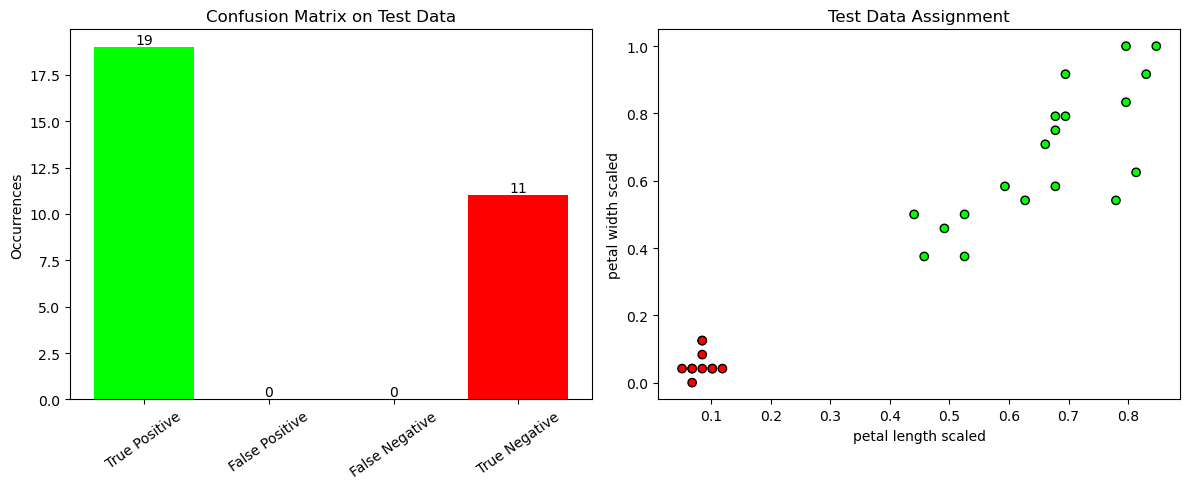

,Accuracy,Precision,True Positive Rate,Specificity,False Positive Rate
metrics,1.0,1.0,1.0,1.0,0.0


In [7]:
# Plotting Confusion Matrix Data

print("Quantum Neural Network Binary Classifier Performance")

QNN.confusion_matrix(xlabel = 'petal length scaled', ylabel = 'petal width scaled', vertical = False)

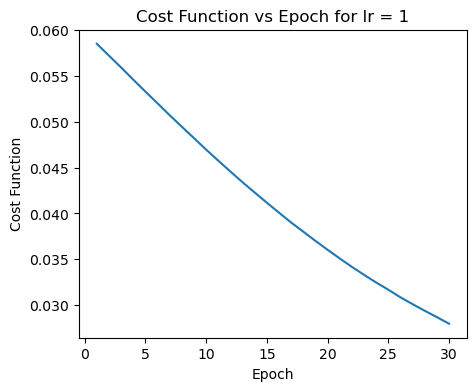

In [8]:
# Plotting the cost function as a function of epoch
QNN.learning_graph()

# Training Perceptron Neural Network using Tensorflow


Here, we implement a binary classifier via classical machine learning methods. In particular, we employ a perceptron neural network using the Tensorflow package. First, we build our classifier using two input neurons, one output neuron, and a sigmoid activation function. We use 'binary_crossentropy' for our loss function, since it is typically appropriate to use in classification tasks. And, we use stochastic gradient descent as our optimizer. After training, we assess the performance of the perceptron algorithm

In [9]:
# Building Perceptron Neural Network
model = Sequential()
model.add(Dense(units = 2 , activation= 'sigmoid'))
model.add(Dense(units = 1 , activation= 'sigmoid'))

# Specifying loss function and Training Method
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Training CNN
model.fit(x_train, binary_targets_train, epochs=100, batch_size= 1)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6733 - loss: 0.6004
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6982 - loss: 0.5548
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - loss: 0.5497
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6754 - loss: 0.5388
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7113 - loss: 0.5108
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 0.5268
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - loss: 0.5170
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6900 - loss: 0.4995
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6243 - loss: 0.5308
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6819 - loss: 0.4908
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7630 - loss: 0.4297
Epoch 12/100
120/120 ━━━━━━━━━━━━━━━━━━━━

In [10]:
# Assessing model predictions on test data
model_prediction = model.predict(x_test)


# Printing Model Prediction Output
print(model_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
[[0.9837232 ]
 [0.08585674]
 [0.9896016 ]
 [0.98911816]
 [0.08585674]
 [0.94356364]
 [0.91546637]
 [0.98040974]
 [0.06814423]
 [0.92175996]
 [0.97947764]
 [0.98256123]
 [0.11105522]
 [0.11105522]
 [0.988764  ]
 [0.9837369 ]
 [0.98426044]
 [0.09355079]
 [0.98670274]
 [0.86539525]
 [0.9675301 ]
 [0.09302967]
 [0.07347526]
 [0.9873383 ]
 [0.0630616 ]
 [0.07935985]
 [0.9753152 ]
 [0.9058006 ]
 [0.9674272 ]
 [0.07347526]]


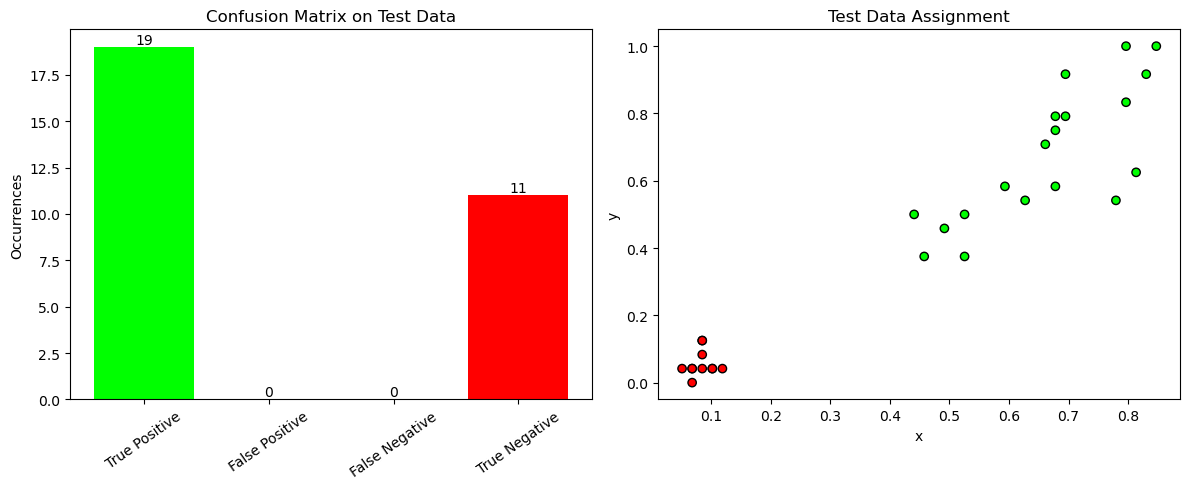

,Accuracy,Precision,True Positive Rate,Specificity,False Positive Rate
metrics,1.0,1.0,1.0,1.0,0.0


In [11]:
# Plotting Confusion Matrix Data
nn_confusion(model_prediction, binary_targets_test, x_test)